In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [86]:
df=pd.read_csv('data.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [87]:
ndf=df.drop(columns=['UDI','Product ID'])
ndf.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [88]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [89]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [90]:
x=ndf.drop(columns=['Target','Failure Type'])
y=ndf['Target']

In [91]:
numeric_features=['Air temperature [K]','Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

categorical_features=['Type']

In [92]:
numeric_t=StandardScaler()
cat_t=OneHotEncoder(handle_unknown='ignore')

In [93]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num',numeric_t,numeric_features),
        ('cat',cat_t,categorical_features)
    ]
)

In [94]:
model=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',RandomForestClassifier(random_state=42))
])

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
model.fit(x_train,y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [96]:
print("Model Accuracy:",model.score(x_test,y_test))
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

Model Accuracy: 0.9805


 Random Forest Classification Report 
                precision    recall  f1-score   support

No Failure (0)       0.98      1.00      0.99      1932
    Failure(1)       0.89      0.49      0.63        68

      accuracy                           0.98      2000
     macro avg       0.94      0.74      0.81      2000
  weighted avg       0.98      0.98      0.98      2000



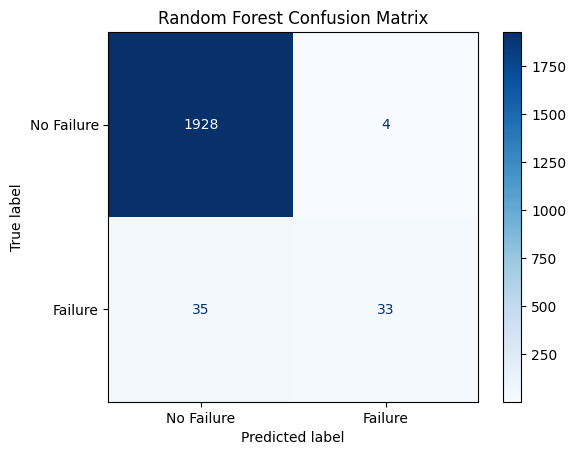

In [97]:
y_pred=model.predict(x_test)
print(" Random Forest Classification Report ")
print(classification_report(y_test,y_pred,target_names=['No Failure (0)','Failure(1)']))
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, display_labels=['No Failure', 'Failure'],cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()
from sklearn.linear_model import LogisticRegression

In [98]:
log_reg_model=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',LogisticRegression(random_state=42,max_iter=1000))
])
log_reg_model.fit(x_train,y_train)
y_pred_log_reg=log_reg_model.predict(x_test)
print("\n Logistic Regression Classification Report  ")
print(classification_report(y_test,y_pred_log_reg,target_names=['No Failure(0)','Failure(1)']))


 Logistic Regression Classification Report  
               precision    recall  f1-score   support

No Failure(0)       0.97      1.00      0.98      1932
   Failure(1)       0.64      0.10      0.18        68

     accuracy                           0.97      2000
    macro avg       0.80      0.55      0.58      2000
 weighted avg       0.96      0.97      0.96      2000



In [ ]:


# Extract the trained RandomForestClassifier from the pipeline
rf_classifier = model.named_steps['classifier']

# Extract the preprocessor from the pipeline to get feature names after transformation
preprocessor = model.named_steps['preprocessor']

# Get feature names after one-hot encoding
# Note: This gets names like 'cat__Type_L', 'cat__Type_M' etc.
cat_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)

# Combine numeric and categorical feature names in the correct order
# The order matches how ColumnTransformer processed them
feature_names = numeric_features + cat_feature_names.tolist()

# Get feature importances
importances = rf_classifier.feature_importances_

# Create a pandas Series for easier viewing and sorting
importance_series = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Print the feature importances
print("\\n--- Feature Importances (Random Forest) ---")
print(importance_series)

# Optional: Plot feature importances
plt.figure(figsize=(10, 6)) # Create a new figure
importance_series.plot(kind='bar')
plt.title('Feature Importances from Random Forest')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('rf_feature_importances.png')
plt.close() # Close plot
print("Feature importance plot saved as rf_feature_importances.png")

\n--- Feature Importances (Random Forest) ---
Torque [Nm]                0.316930
Rotational speed [rpm]     0.233269
Tool wear [min]            0.168841
Air temperature [K]        0.135303
Process temperature [K]    0.121558
Type_L                     0.011088
Type_M                     0.008193
Type_H                     0.004818
dtype: float64
Feature importance plot saved as rf_feature_importances.png


# Hyperparameter Tuning


In [107]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score

In [106]:
param_grid={
    'classifier__n_estimators':[100,200,300],
    'classifier__max_depth':[None,10,20,30],
    'classifier__min_samples_split':[2,5,10],
    'classifier__max_features':['sqrt','log2']
}

In [108]:
grid_search=GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring=make_scorer(f1_score,pos_label=1),
    verbose=2
)

In [109]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'classifier__max_depth': [None, 10, ...], 'classifier__max_features': ['sqrt', 'log2'], 'classifier__min_samples_split': [2, 5, ...], 'classifier__n_estimators': [100, 200, ...]}"
,scoring,"make_scorer(f..., pos_label=1)"
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [110]:
print("Best Parameters:",grid_search.best_params_)
print("Best Cross-Valdiation Score:",grid_search.best_score_)

Best Parameters: {'classifier__max_depth': None, 'classifier__max_features': 'log2', 'classifier__min_samples_split': 5, 'classifier__n_estimators': 300}
Best Cross-Valdiation Score: 0.7292690769829328


In [111]:
best_model = grid_search.best_estimator_


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.88      0.65      0.75        68

    accuracy                           0.98      2000
   macro avg       0.93      0.82      0.87      2000
weighted avg       0.98      0.98      0.98      2000



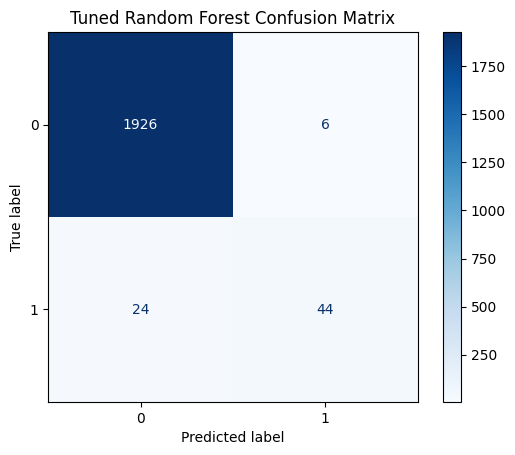

In [112]:
y_pred = best_model.predict(x_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(best_model, x_test, y_test, cmap='Blues')
plt.title("Tuned Random Forest Confusion Matrix")
plt.show()


## Model Comparison and Conclusion

Comparing the classification reports for the three models, focusing on the performance for predicting **Failures (Class 1)**:

| Model                | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) |
|----------------------|---------------------|-----------------|--------------------|
| Logistic Regression  | 0.64                | 0.10            | 0.18               |
| Baseline Random Forest| 0.89                | 0.49            | 0.63               |
| Tuned Random Forest  | 0.88                | 0.65            | 0.75               |

**Analysis:**

* **Random Forest significantly outperforms Logistic Regression** across all relevant metrics for predicting failures. Logistic Regression has very poor Recall (0.10), indicating it misses most actual failures.
* **Hyperparameter tuning improved the Random Forest model substantially.** While Precision saw a minor decrease (from 0.89 to 0.88), Recall increased significantly (from 0.49 to 0.65). This means the tuned model now correctly identifies about 65% of the actual failures, compared to only 49% before tuning.
* The **F1-Score**, which balances Precision and Recall, shows a clear improvement after tuning (from 0.63 to 0.75), indicating a better overall performance on the critical 'Failure' class.

**Conclusion:**

The **Tuned Random Forest model is the best performing model** for this predictive maintenance task. It offers high precision (88% of predicted failures are correct) while also achieving a much better recall (catching 65% of actual failures) compared to the baseline model and vastly outperforming Logistic Regression.

In [113]:
import joblib
# Saving the tuned Random Forest model to disk
joblib.dump(best_model, 'predictive_maintenance_tuned_rf.joblib')

print("Tuned Random Forest model saved successfully!")


Tuned Random Forest model saved successfully!
